In [0]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [0]:
text="""Speed limit (20km/h)
Speed limit (30km/h)
Speed limit (50km/h)
Speed limit (60km/h)
Speed limit (70km/h)
Speed limit (80km/h)
End of speed limit (80km/h)
Speed limit (100km/h)
Speed limit (120km/h)
No passing
No passing for vehicles over 3.5 metric tons
Right-of-way at the next intersection
Priority road
Yield
Stop
No vehicles
Vehicles over 3.5 metric tons prohibited
No entry
General caution
Dangerous curve to the left
Dangerous curve to the right
Double curve
Bumpy road
Slippery road
Road narrows on the right
Road work
Traffic signals
Pedestrians
Children crossing
Bicycles crossing
Beware of ice/snow
Wild animals crossing
End of all speed and passing limits
Turn right ahead
Turn left ahead
Ahead only
Go straight or right
Go straight or left
Keep right
Keep left
Roundabout mandatory
End of no passing
End of no passing by vehicles over 3.5 metric ...
"""

In [0]:
y_out=[]
for i in text.split('\n'):
  y_out.append(i)

In [0]:
import pickle
with open('../input/traffic-signs-preprocessed/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')

In [0]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
data['y_train']=to_categorical(data['y_train'],num_classes=43)
data['y_validation']=to_categorical(data['y_validation'],num_classes=43)

# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

In [0]:
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)


y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 600)               615000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 600)              

In [0]:
history = model.fit(data['x_train'], data['y_train'],
              batch_size=128, epochs = 5,
              validation_data = (data['x_validation'], data['y_validation']))

In [0]:
# saving model
name = 'model-3.h5'
model.save(name)

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [0]:
from IPython.display import FileLink
FileLink('model-3.h5')# create link for download model

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
model.load_weights('model-3 (1).h5')#load model

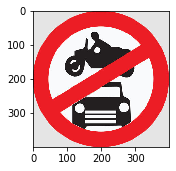

In [0]:
import cv2
a=cv2.imread("nov.jpg",) #a is an input image
a=cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

import matplotlib.image as mpimg
c=mpimg.imread('nov.jpg')
plt.imshow(c)

In [0]:
a=a/255.0
import pickle
with open('mean_image_rgb.pickle', 'rb') as f:
    mean = pickle.load(f, encoding='latin1')
mean=np.reshape(mean['mean_image_rgb'],(32,32,3))
a=a-mean

In [0]:
a=np.reshape(a,(1,32,32,3))
pre=model.predict(a)
#print(pre[0])
b=list(pre[0])
prediction = np.argmax(pre)
y_out[prediction]

[2.6689446e-11 6.0383769e-07 1.7487855e-18 1.4972186e-12 7.2597694e-20
 3.4224489e-21 9.0030292e-14 5.2069668e-33 4.0653303e-20 1.6509449e-15
 3.7083783e-21 1.3881947e-15 4.5656384e-14 1.7560785e-26 2.7737945e-36
 2.9522239e-23 9.0995663e-22 4.1387094e-24 1.5682459e-12 2.5539192e-11
 6.6013243e-13 5.9787624e-14 8.7137476e-17 1.1207451e-04 1.8920785e-18
 5.9751812e-07 3.7517626e-02 1.4275415e-07 6.1811811e-06 3.1539715e-10
 2.9988026e-10 3.7434187e-05 5.2804674e-14 9.0481573e-16 1.2476339e-17
 7.6734863e-14 8.4589913e-12 3.0957253e-21 3.4805316e-13 3.4668102e-13
 9.5897347e-01 3.3517696e-03 1.0547504e-22]


'Roundabout mandatory'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 31.5, 31.5, -0.5)

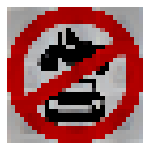

In [0]:
a=cv2.resize(a,(32,32))
plt.figure()
plt.imshow(a)
plt.axis('off')
